# Motivation
Dieser Seminararbeit basiert auf einem Datensatz von Kaggle mit über 9800 hochrangigen Spielen von dem berümten Spiel League of Legends.
Wenn Sie jemals League of Legends gespielt haben, wissen Sie, wie sich viele Spiele wie ein Münzwurf anfühlen, aber in den meisten Fällen können Sie tatsächlich etwas dagegen tun und gewinnen! In dieser Arbeit wrid eine explorative Datenanalyse dieses Datensatzes durchgeführt um, zu sehen, wie Sie (statistisch) mehr Spiele gewinnen können!.
Die Features in diesem Datensatz werden während jedes Spiels nach 10 Minuten abgefragt.

# Daten- vorverarbeitung/präprozessieren
Wir wählen die Features aus, die das Ergebnis des Spiels am meisten beeinflussen.

In [1]:
best_features_list = ['blueWins','blueGoldDiff','blueExperienceDiff','blueAvgLevel','redAvgLevel',
                      'redKills','blueKills','blueAssists','redAssists','blueCSPerMin','redCSPerMin',
                      'blueFirstBlood','redFirstBlood','blueEliteMonsters','redEliteMonsters',
                      'blueDragons','redDragons']

# Explorative Datenanalyse (EDA)
Nun wird die Korrelationen des Features mit der unabhängigen Variablen mithilfe der .corr()-Methode von Pandas ermitteln.

Wichtige Bibleotheken zum Laden- und Visualisierungszwecke werden importiert.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Einladen des Pfades aus dem lokalem Ordner

In [3]:
df = pd.read_csv(r'C:\Users\Administrator\Documents\Datenanalyse\archive\high_diamond_ranked_10min.csv')

Ausgeben das eingeladene Datensatz, um zu sehen wie es aussieht.

In [4]:
df

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


Mit der info() Methode können detailiertere Infos über das Datensatz bekommen werden.  

In [ ]:
df.info()

Positive Correlations:
blueGoldDiff          0.511119
blueExperienceDiff    0.489558
blueAvgLevel          0.357820
blueKills             0.337358
blueAssists           0.276685
Name: blueWins, dtype: float64


Negative Correlations:
redAvgLevel        -0.352127
redKills           -0.339297
redAssists         -0.271047
redEliteMonsters   -0.221551
redCSPerMin        -0.212171
Name: blueWins, dtype: float64


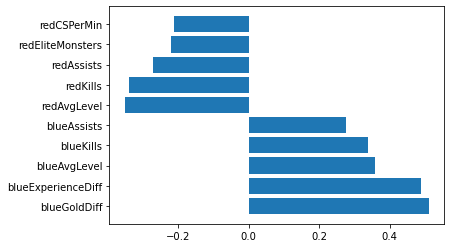

In [8]:
new_df = df[best_features_list]
corr = new_df.corr()
print('Positive Correlations:')
print(corr.loc['blueWins'].sort_values(ascending=False)[1:6])

x = corr.loc['blueWins'].sort_values(ascending=False)[1:6]
x = x[:].tolist()
print('\n')
print('Negative Correlations:')
print(corr.loc['blueWins'].sort_values(ascending=True)[:5])
y = corr.loc['blueWins'].sort_values(ascending=True)[:5]
y = y[:].tolist()
for i in y:
    x.append(i)

x = np.array(x)
y = np.array(['blueGoldDiff', 'blueExperienceDiff', 'blueAvgLevel', 'blueKills','blueAssists',
              'redAvgLevel', 'redKills', 'redAssists', 'redEliteMonsters', 'redCSPerMin'])
plt.barh(y, x)
plt.show()

Wie aus der Ausgabe zu sehen ist, zeigen die positiven Korrelationen die Merkmale, die beim Gewinnen des Spiels am wichtigsten sind (wobei blueWins = 1), und die negativen Korrelationen zeigen die Merkmale, die beim Verlieren des Spiels am wichtigsten sind (wobei blueWins = 0). Das Balkendiagramm zeigt die vorherigen Informationen aufgeräumter an.
Nach dem Anzeigen des Korrelationen, wird ein Blick auf bestimmte Merkmale geworfen, um zu sehen, wie sie sich auf das Ergebnis des Spiels auswirken.

# Prozentsatz der Spiele, bei denen das blaue Team mit negativer/positiver Golddifferenz gewinnt

das erste Merkmal ist das wichtigste, weil es die höchste Korrelation aufweist, und es ist das 'blueGoldDiff', welche die Golddifferenz zwischen den beiden Teams beschreibt. Es ist das Ergebnis des gesamten Goldes des blauen Teams minus des gesamten Goldes des roten Teams.

In [9]:
AnzBlueTeamWins = sum(df['blueWins'] == 1) # Anzahl Siege des blauen Teams
P_blueGoldDiff = sum((df['blueGoldDiff'] > 0) & (df['blueWins'] == 1))  # Positiv blauGoldDiff
Pro_P_Wins = sum((df['blueGoldDiff'] > 0) & (df['blueWins'] == 1))/AnzBlueTeamWins  # Prozentsatz der Spiele, bei denen das blaue Team mit einer positiven Golddifferenz gewinnt
N_blueGoldDiff = sum((df['blueGoldDiff'] < 0) & (df['blueWins'] == 1))  # Negativ blueGoldDiff
Pro_N_Wins = sum((df['blueGoldDiff'] < 0) & (df['blueWins'] == 1))/AnzBlueTeamWins  # Prozentsatz der Spiele, bei denen das blaue Team mit einer negativen Golddifferenz gewinnt

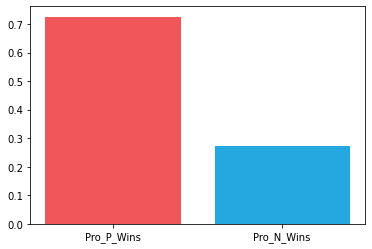

In [10]:
x = np.array(["Pro_P_Wins", "Pro_N_Wins"])
y = np.array([Pro_P_Wins, Pro_N_Wins])

plt.bar(x,y, color = ["#f1565a", "#24a8df"])
plt.show()

Wie dem vorherigen Balkendiagramm entnommen kann, gewann Team Blue etwa 72 % der Spiele, in denen es bis zur 10-Minuten-Marke einen goldenen Vorsprung hatte. Dieser ist ziemlich intuitiv, denn wenn das eigene Team mehr Gold als das gegnerische Team hat, kann es Gegenstände schneller kaufen, mehr Kills erzielen und das Spielende beschleunigen. Das heißt, dass Sie das Spiel in 72 % der Fälle gewonnen wird, wenn das eigene Team bis zur 10-Minuten-Marke einen goldenen Vorsprung hat.

# Durchschnittliches Level jedes Teams, wenn das blaue Team gewinnt

Dieses nächste Feature zeigt fast keinen Unterschied zwischen beiden Teams, das liegt höchstwahrscheinlich daran, dass diese Daten aus hochrangigen Spielen stammen und Spieler in höheren Rängen wissen, wie man in frühen Levels nicht zurückfällt. Nichtsdestotrotz zeigt es, dass das durchschnittliche Niveau des blauen Teams etwas höher ist als das des roten Teams.

durchschnitt blue 7.025395537525382
durchschnitt red 6.817606490872092


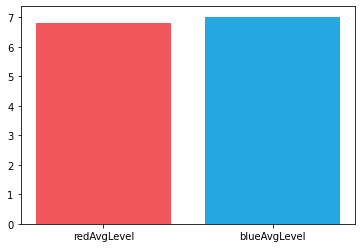

In [19]:
####################### bezüglich blue team ################
sub_df_blue = df[(df['blueAvgLevel'] >= 0) & (df['blueWins'] == 1)]
sum_of_kills = sum(sub_df_blue.iloc[:]['blueAvgLevel'])
number_of_rows = sub_df_blue.shape[0]
blueAvgLevel = sum_of_kills/number_of_rows
print("durchschnitt blue", blueAvgLevel)
######################## bezüglich red Team ####################
sub_df_red = df[(df['redAvgLevel'] >= 0) & (df['blueWins'] == 1)]
sum_of_kills = sum(sub_df_red.iloc[:]['redAvgLevel'])
number_of_rows = sub_df_red.shape[0]
redAvgLevel = sum_of_kills/number_of_rows
print("durchschnitt red", redAvgLevel)
###################### Plotten ###########################
x = np.array(["redAvgLevel", "blueAvgLevel"])
y = np.array([redAvgLevel, blueAvgLevel])

plt.bar(x,y, color = ["#f1565a", "#24a8df"])
plt.show()

# Average kills for each Team when Blue Team wins

Das nächste Feature ist 'Team-Kills'. Im Durchschnitt hat das blaue Team nach 10 Minuten und in einem Spiel, in dem das blaue Team gewinnt, 7 Kills, während das rote Team (das gegnerische) 5 hat, wie im nächsten Balkendiagramm zu sehen ist. Dies knüpft an das erste Feature an, das oben bereits analysiert ist, den Goldunterschied, denn wenn ein Spieler aus dem eigenen Team jemanden im gegnerischen Team tötet, erhält das eigene Team Gold als Belohnung.

durchschnitt blue 7.201622718052739
durchschnitt red 5.1403651115618665


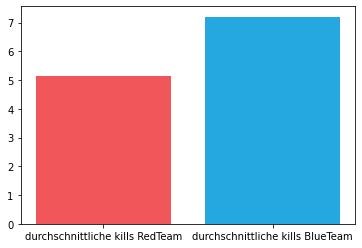

In [18]:
####################### bezüglich blue team ################
sub_df_blue = df[(df['blueKills'] >= 0) & (df['blueWins'] == 1)]
sum_of_kills = sum(sub_df_blue.iloc[:]['blueKills'])
number_of_rows = sub_df_blue.shape[0]
durchschnitt_BlueTeam = sum_of_kills/number_of_rows
print("durchschnitt blue", durchschnitt_BlueTeam)
####################### bezüglich red team ################
sub_df_red = df[(df['redKills'] >= 0) & (df['blueWins'] == 1)]
sum_of_kills = sum(sub_df_red.iloc[:]['redKills'])
number_of_rows = sub_df_red.shape[0]
durchschnitt_RedTeam = sum_of_kills/number_of_rows
print("durchschnitt red", durchschnitt_RedTeam)
###################### Plotten ###########################
x = np.array(["durchschnittliche kills RedTeam", "durchschnittliche kills BlueTeam"])
y = np.array([durchschnitt_RedTeam, durchschnitt_BlueTeam])
plt.bar(x,y, color = ["#f1565a", "#24a8df"])
plt.show()


# Average assists for each team when blue Team wins

Assists (Deutsch. beteiligung) bedeuten im frühen Spiel (vor der 10-Minuten-Marke) viel, da dies bedeuten kann, dass der 'Jungler' (d.h. Ein Spieler mit bestimmter Rolle im Team) des eigenen Team Lanes (d.h. Kampffront, Kampfplatz) gankt oder andere Lanes umherwandern (d.h. das eigene Kampffront verlassen, um eine anderes Kampffront auf der Spielkarte beizutreten, wenn Unterstützung gefragt ist). Dies ist eine gute Strategie, um Lanes zu sichern und gewinnen.

durchschnitt blue 7.771805273833672
durchschnitt red 5.559432048681542


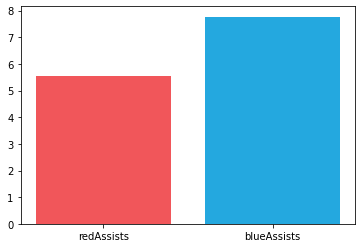

In [17]:
####################### bezüglich blue team ################
sub_df_blue = df[(df['blueAssists'] >= 0) & (df['blueWins'] == 1)]
sum_of_kills = sum(sub_df_blue.iloc[:]['blueAssists'])
number_of_rows = sub_df_blue.shape[0]
durchschnitt_BlueTeam = sum_of_kills/number_of_rows
print("durchschnitt blue", durchschnitt_BlueTeam)
####################### bezüglich red team ################
sub_df_red = df[(df['redAssists'] >= 0) & (df['blueWins'] == 1)]
sum_of_kills = sum(sub_df_red.iloc[:]['redAssists'])
number_of_rows = sub_df_red.shape[0]
durchschnitt_RedTeam = sum_of_kills/number_of_rows
print("durchschnitt red", durchschnitt_RedTeam)
###################### Plotten ###########################
x = np.array(["redAssists", "blueAssists"])
y = np.array([durchschnitt_RedTeam, durchschnitt_BlueTeam])
plt.bar(x,y, color = ["#f1565a", "#24a8df"])
plt.show()

# Percentage of games where blue team wins with first blood

'First Blood' ist ein wichtiges Feature, da es das eigene Team einen frühen Vorsprung verschafft, und in den meisten Fällen muss der getötete gegnerische Team-Champion einen Beschwörerzauber wie 'Teleportation' verschwenden, um wieder auf die Lane schneller zu gelangen und möglicherweise fehlenden 'CS' aufzuholen.

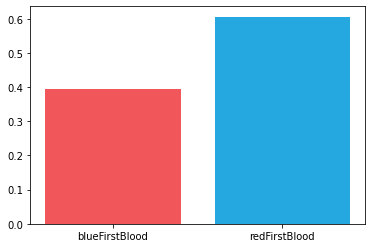

In [16]:
AnzBlueTeamWins = sum(df['blueWins'] == 1) # number of blue Team wins
P_blueGoldDiff = sum((df['blueFirstBlood'] > 0) & (df['blueWins'] == 1))  # Positive blueGoldDiff
Pro_P_Wins = P_blueGoldDiff/AnzBlueTeamWins  # precentage of games where Blue Team wins with positive gold difference
N_blueGoldDiff = sum((df['redFirstBlood'] > 0) & (df['blueWins'] == 1))  # Negative blueGoldDiff
Pro_N_Wins = N_blueGoldDiff/AnzBlueTeamWins  # precentage of games where Blue Team wins with negative
x = np.array(["blueFirstBlood", "redFirstBlood"])
y = np.array([Pro_N_Wins, Pro_P_Wins])

plt.bar(x,y, color = ["#f1565a", "#24a8df"])
plt.show()

Wenn das eigene Team 'First Blood' bekommt, hat es statistisch gesehen eine Chance von 60 %, das Spiel zu gewinnen, 10 % mehr als die Standardchance von 50 %.

# Schlussfolgerung
Zusammenfassend lässt sich sagen, dass das Spiel gewonnen wird, wenn das eigene Team das meiste Gold hat, und sich Ihren Weg zum Sieg schleichen können. Es gibt mehrere Möglichkeiten, Gold-Leads zu erhalten, zum Beispiel: 'Erstes Blut' bekommen, 'Turmplatten' bekommen, vermeiden, dass das gegnerische Team ddie eigene 'Turmplatten' bekommt, 'CSing' und vieles mehr (auf die andere Seite der Spiel-Karte zu streifen, um die 0/5-Unterstützer (d.h. Ein Spieler mit bestimmter Rolle im Team) zu töten, ist es nicht einer von ihnen).

Denken Sie als letzte Beobachtung daran, immer Spaß zu haben. Du kannst nicht jedes Spiel gewinnen, aber du kannst immer versuchen, Spaß zu haben.